In [1]:
from uatu.watchers import *
from sklearn.model_selection import train_test_split
import h5py

/home/sean/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from corner import corner
from chainconsumer import ChainConsumer
sns.set()

In [3]:
f = h5py.File('../data/UatuTest4_data.hdf5', 'r')
boxno = 0
#X = np.array(f['Box%03d'%boxno]["X"])
Y = f['Box%03d'%boxno]['Y'][0]

In [4]:
print Y
print Y[0] - 0.022/(0.7**2)

[0.323218 0.913621]
0.27832004081632655


In [5]:
%%bash
ls *preds*

bayesian_net_preds2_00.npy
bayesian_net_preds2_01.npy
bayesian_net_preds2_02.npy
bayesian_net_preds2_03.npy
bayesian_net_preds2_04.npy
bayesian_net_preds2_05.npy
bayesian_net_preds2_06.npy
bayesian_net_preds2_07.npy
bayesian_net_preds2_08.npy
bayesian_net_preds2_09.npy
org_bayesian_net_preds_00.npy
org_bayesian_net_preds_01.npy
org_bayesian_net_preds_02.npy
org_bayesian_net_preds_03.npy
org_bayesian_net_preds_04.npy
org_bayesian_net_preds_05.npy
org_bayesian_net_preds_06.npy
org_bayesian_net_preds_07.npy
org_bayesian_net_preds_08.npy
org_bayesian_net_preds_09.npy
org_bayesian_net_preds2_00.npy
org_bayesian_net_preds2_01.npy
org_bayesian_net_preds2_02.npy
org_bayesian_net_preds2_03.npy
org_bayesian_net_preds2_04.npy
org_bayesian_net_preds2_05.npy
org_bayesian_net_preds2_06.npy
org_bayesian_net_preds2_07.npy
org_bayesian_net_preds2_08.npy
org_bayesian_net_preds2_09.npy
org_bayesian_net_preds_training_00.npy
org_bayesian_net_preds_training_01.npy
org_bayesian_net_preds_training_02.npy
org

In [6]:
bayes_org_preds = np.loadtxt('org_bayesian_net_preds2_%02d.npy'%boxno)

bayes_org_preds[:, 2:4] = np.exp(bayes_org_preds[:,2:4]/2)
bayes_org_preds[:, -1] = 0.9*np.tanh(bayes_org_preds[:,-1])

In [7]:
standard_net_preds = np.loadtxt('standard_net_preds2_%02d.npy'%boxno)

In [8]:
%%bash
ls *simulated*

simulated_chain_100_walkers_05_steps.npy
simulated_chain_100_walkers_500_steps.npy
simulated_chain_10_walkers_02_steps.npy
simulated_chain_16_walkers_05_steps.npy
simulated_chain2_100_walkers_500_steps.npy
simulated_chain3_10_walkers_500_steps.npy
simulated_chain3_training_10_walkers_500_steps.npy
simulated_chain4_10_walkers_500_steps.npy
simulated_chain5_10_walkers_500_steps.npy
simulated_chain5_2.npy


In [9]:
mcmc_preds = np.loadtxt('simulated_chain5_2.npy')

In [10]:
mcmc_preds.shape

(5000, 2)

In [11]:
c = ChainConsumer()

param_names = [r'$\Omega_m$', r'$\sigma_8$', r'$\sigma_{\Omega_m}$', r'$\sigma_{\sigma_8}$',r'$\rho$' ]
c.add_chain(bayes_org_preds, parameters = param_names, name = 'Bayes Correlation NN')
c.add_chain(standard_net_preds, parameters = param_names[:2], name = 'Standard NN')
c.add_chain(mcmc_preds, parameters = param_names[:2], name = 'MCMC')

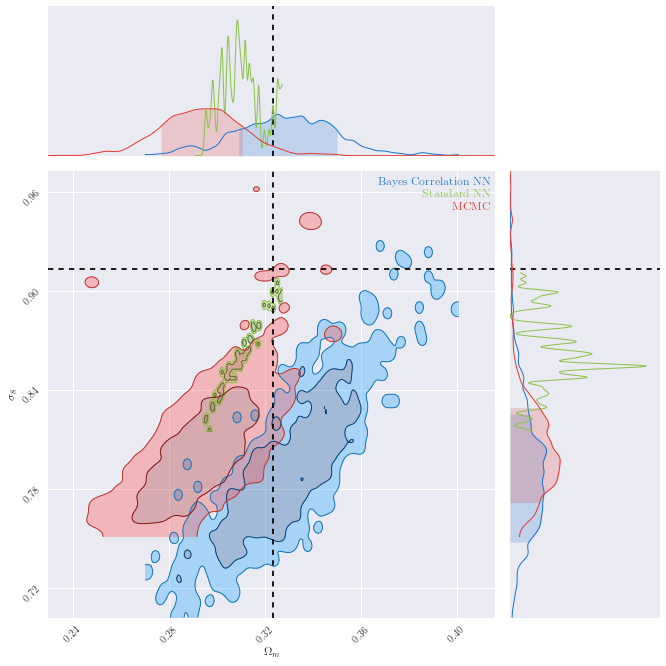

In [12]:
c.plotter.plot(figsize = (10,10), truth = Y, parameters = param_names[:2]);

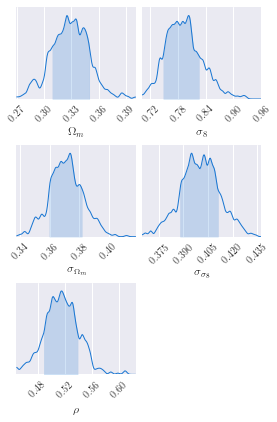

In [27]:
c.plotter.plot_distributions(chains = 'Bayes Correlation NN', col_wrap = 2);

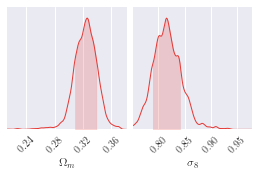

In [13]:
c.plotter.plot_distributions(chains = 'MCMC', col_wrap = 2);